import numpy as np
import pandas as pd
import dask.dataframe as dd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [2]:
path = "../files/"


### Load Articles Dataset
Identify numeric columns. Image of the article in the images folder matches the article id
<br/>


In [3]:
articles_df = pd.read_csv(path + "articles.csv",
                          dtype={
                            "article_id": int,
                            "product_code": int,
                            "product_type_no": int,
                            "graphical_appearance_no": int,
                            "index_group_no": int,
                            "section_no": int,
                            "garment_group_no": int
                          })
articles_df.shape

(105542, 25)

### Empty Check for Article Dataframe

Based on the findings of the following code, Article Dataset is complete in all respects and it has no nulls with exception of detail_desc which is empty of 416 rows. This is immaterial considering that article data frame contains "105542"rows.

In [4]:
articles_df.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

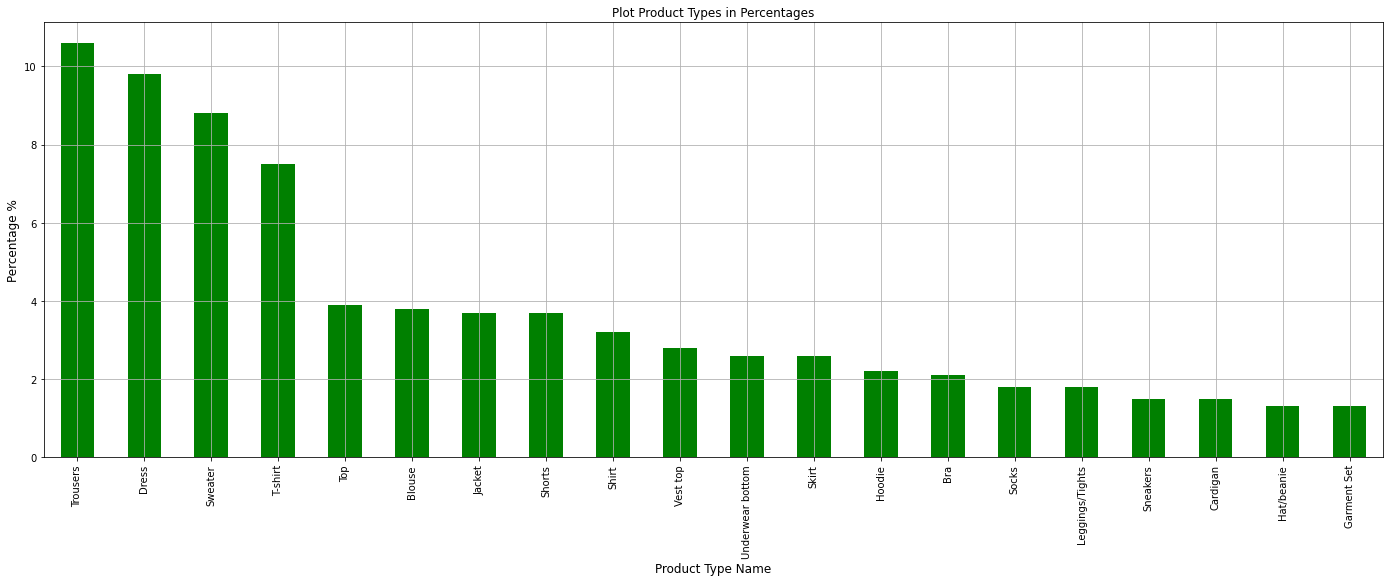

In [5]:
# Product Type Analysis
ax = articles_df['product_type_name'].value_counts(normalize=True, 
                ascending = False)[:20].mul(100).round(1).plot(
                kind = 'bar', color = 'green', figsize = (24, 8),
                title = 'Plot Product Types in Percentages')
ax.set_xlabel('Product Type Name', fontsize = 12)
ax.set_ylabel('Percentage %', fontsize=12)
plt.tick_params(labelsize = 10)
plt.grid()

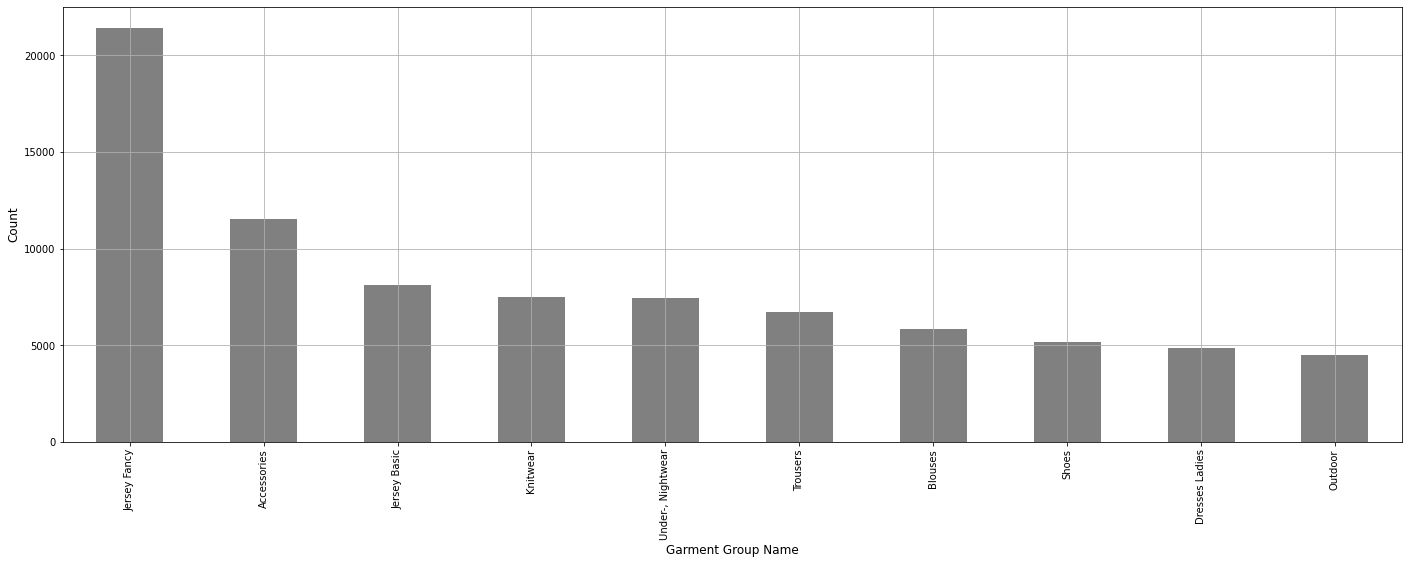

In [6]:
# Top 20 Garment Groups
ax = articles_df['garment_group_name'].value_counts(ascending = False
                )[:10].plot(
                kind = 'bar', color = 'gray', figsize = (24, 8))
ax.set_xlabel('Garment Group Name', fontsize = 12)
ax.set_ylabel('Count', fontsize=12)
plt.tick_params(labelsize = 10)
plt.grid()

### Load Customer Dataset
<br/>


In [7]:
customer_df = pd.read_csv(path+"customers.csv")
customer_df.shape

(1371980, 7)

In [8]:
customer_df['Active'].value_counts()

1.0    464404
Name: Active, dtype: int64

In [9]:
total_customer_records = customer_df.shape[0]
# Temp Dataframe
temp_df = customer_df.isna().sum().to_frame()
temp_df = temp_df.reset_index()
temp_df.columns = ['label', 'percentage_nulls']
temp_df['percentage_nulls'] = temp_df['percentage_nulls'].apply(lambda x: round(100*x/total_customer_records, 2))
temp_df

,label,percentage_nulls
0,customer_id,0.00
1,FN,65.24
2,Active,66.15
3,club_member_status,0.44
4,fashion_news_frequency,1.17
5,age,1.16
6,postal_code,0.00


### Observing the data looks like fashion_news_frequency ...
Looks like FN column doesnot contain useful information and can be dropped.
Main rows of interest are Age / Active / Club Member Status / Fashion News Frequence
Postal code contains encrypted information and is not much of value add during Analysis Graph,
however would add value in the model

In [10]:
# Drop FN Column
customer_df = customer_df.drop(columns=['FN'])

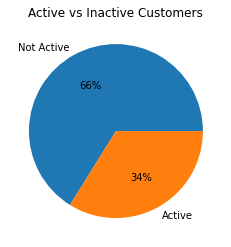

In [11]:
# Analysis Active vs Non Active Customers
customer_df['Active'] = customer_df['Active'].fillna(0)
plt.title("Active vs Inactive Customers")

labels = ['Not Active', 'Active']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[4:8]

#create pie chart
plt.pie(customer_df['Active'].value_counts(), labels = labels, autopct='%.0f%%')
plt.show()

In [12]:
customer_df['fashion_news_frequency'] = customer_df['fashion_news_frequency'].replace(
    {'NONE':'Non-Member', 'None':'Non-Member'})
customer_df['fashion_news_frequency'].value_counts()


Non-Member    877713
Regularly     477416
Monthly          842
Name: fashion_news_frequency, dtype: int64

In [13]:
customer_df['club_member_status'] = customer_df['club_member_status'].fillna('NON-MEMBER')
customer_df['club_member_status'].value_counts()


ACTIVE        1272491
PRE-CREATE      92960
NON-MEMBER       6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

## Age Group

Age has only 1.16% of the values empty so let'z Impute Unavailable Age Information with 
Mean of the dataset. <br/>
Finally let'z age in the dataset in a graph


In [14]:
# Impute Age Nulls with the mean value
customer_df['age'] = customer_df['age'].fillna(customer_df['age'].mean())


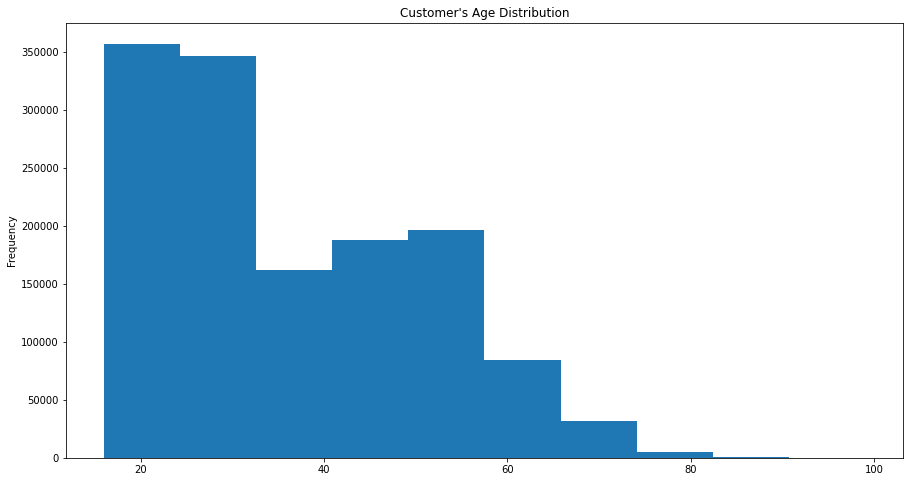

In [15]:
customer_df["age"].plot.hist(figsize=(15, 8), title="Customer's Age Distribution")
plt.show()

### Load Transaction Dataset
<br/>

In [16]:
transactions_df = pd.read_csv(path + "transactions_train.csv", parse_dates=['t_dat'])
transactions_df.shape

(31788324, 5)

In [17]:
transactions_df.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [18]:
transactions_df['row_num'] = transactions_df.reset_index().index

### Clean Data Nothing Impute
<br/>
Lets create date specific features for imputing the transaction dataset
<br/>


In [19]:
transactions_df['day'] = transactions_df['t_dat'].dt.day
transactions_df['month'] = transactions_df['t_dat'].dt.month
transactions_df['year'] = transactions_df['t_dat'].dt.year
transactions_df['dayofweek'] = transactions_df['t_dat'].dt.dayofweek
transactions_df = transactions_df.drop(columns=['t_dat'])
transactions_df

,customer_id,article_id,price,sales_channel_id,row_num,day,month,year,dayofweek
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0,20,9,2018,3
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1,20,9,2018,3
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2,20,9,2018,3
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,3,20,9,2018,3
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,4,20,9,2018,3
...,...,...,...,...,...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,31788319,22,9,2020,1
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,31788320,22,9,2020,1
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,31788321,22,9,2020,1
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,31788322,22,9,2020,1


## Let's Plot Some Graphs over Transactions Dataframe 


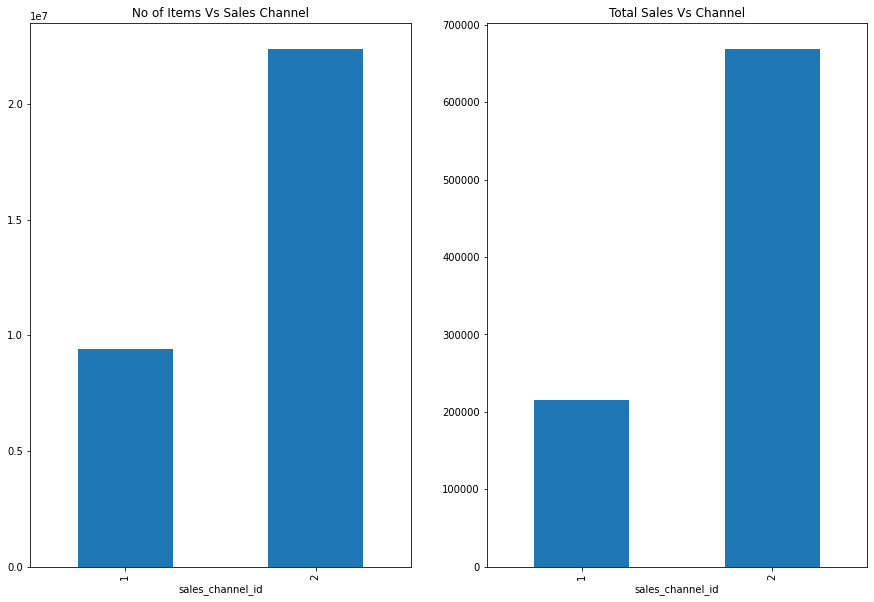

In [20]:
from matplotlib.pyplot import figure

# Comparing Sales Channels 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15,10)
transactions_df.groupby(by=["sales_channel_id"])['article_id'].count().plot(kind="bar", ax=ax1, 
                                                                            title="No of Items Vs Sales Channel")
transactions_df.groupby(by=["sales_channel_id"])['price'].sum().plot(kind="bar", ax=ax2, 
                                                                     title="Total Sales Vs Channel")
plt.show()


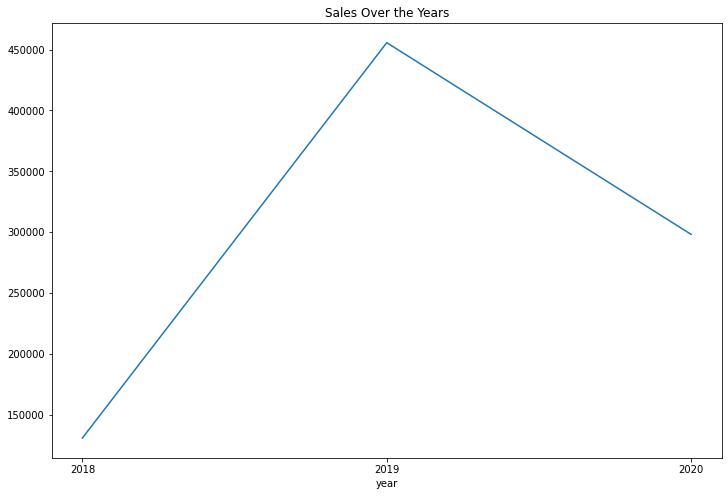

In [21]:
# Year X Ticks
plt.xticks([2018, 2019, 2020])
transactions_df.groupby(by=["year"])['price'].sum().plot(kind="line", 
                                                         figsize = (12, 8),
                                                         title="Sales Over the Years")
plt.show()

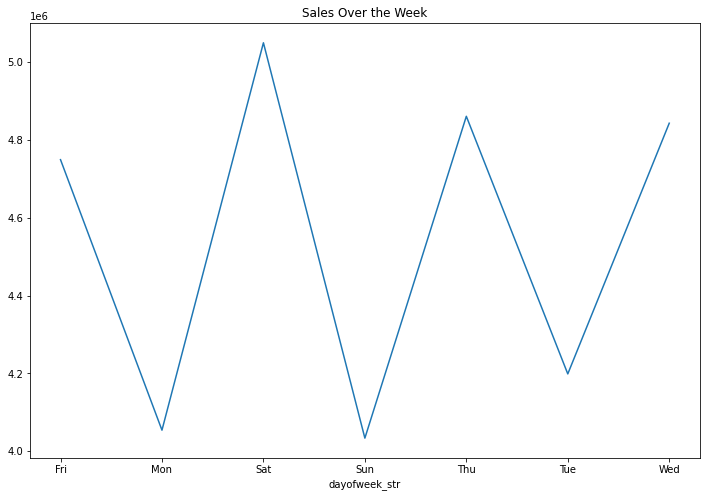

In [22]:
## Day of Week Influence Over Sales
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
transactions_df['dayofweek_str'] = transactions_df['dayofweek'].apply(lambda x:days[x])
transactions_df.groupby(by=["dayofweek_str"])['row_num'].count().plot(kind="line", 
                                                                      figsize = (12, 8),
                                                                      title="Sales Over the Week")
plt.show()
# Drop Column dayofweek_str
transactions_df = transactions_df.drop(columns=["dayofweek_str"])


### Prepare the data set for feature extraction 
<br/>
Letz begin with consolidating tables before running logistic regression

In [23]:
df = transactions_df.merge(customer_df, on ='customer_id')
df = df.merge(articles_df, on ='article_id')
df.head()

,customer_id,article_id,price,sales_channel_id,row_num,day,month,year,dayofweek,Active,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0,20,9,2018,3,0.0,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,165807,24,9,2018,0,0.0,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
2,1385e5f3a2d3dbd21237f91faf81254a6d96de31b07b0b...,663713001,0.050831,2,2143848,5,11,2018,0,0.0,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
3,1385e5f3a2d3dbd21237f91faf81254a6d96de31b07b0b...,663713001,0.050831,2,2143849,5,11,2018,0,0.0,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
4,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,10026,20,9,2018,3,1.0,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."


In [ ]:
df.to_csv(path + 'merged.csv')

# Product Transaction Dataframe

In [ ]:
temp_df = transactions_df.copy()
# Concatenate CustomerId ArticleId and try to ascertain the number of items purchased
temp_df['combined'] = temp_df.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
print('combined data complete ...')
temp2_df = temp_df.groupby(by=["combined"]).size().to_frame(name='count')
temp2_df['combined'] = temp2_df.index
# Split the combined data to customer_id & article_id
temp2_df['customer_id'] = temp2_df['combined'].apply(lambda x: x.split("_")[0])
temp2_df['article_id'] = temp2_df['combined'].apply(lambda x: x.split("_")[1])
print('Temp2 Step complete ...')
# Sort in descending order of purchases
customer_product_df = temp2_df[['customer_id', 'article_id', 'count']].copy().sort_values(by='count', ascending=False)
customer_product_df.reset_index(drop = True, inplace=True)
customer_product_df

In [ ]:
customer_product_df.to_csv(path + 'customer_product_purchase.csv')